# Session 7: Principle Components

### Introduction:

**Supervised Learning**: typically have a set of p features measured on n observations, ad a response Y also measured on those same n observations. Predict Y using features.

**Unsupervised Learning**: We have only a set of features. Not interested in prediction, but rather, discover interesting things about the measurements.

- Unsupervised learning is often performed as part of *exploratory data analysis*.

**Principle Components**: When faced with a large set of correlated variables, principal components allows us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.

The idea is to find a low-dimensional representation of the data that captures as much of the information as possible

Principle components of a set of data in $\mathbb{R}^p$ provide a sequence of best linear approximations to that data, of all ranks $q \leq p$.

Singular Value Decomposition

$$\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^T$$

*Notation*:\
$\mathbf{V}$ is a $p \times q$ matrix with q orthogonal unit vectors as columns (slope)\
$\mathbf{D}$ is a $p \times p$ diagonal matrix\
$\mathbf{U}$ is an $N \times p$ orthogonal matrix

Columns UD are called the principle components of X.


**Latent Variables and Factor Analysis**

We have an equation of the form:

$$X = \mathbf{A}S + \varepsilon$$

where we have more equations than variables. S is modeled as Gaussian random.

**Independent Component Analysis**

Exactly the same form except S are assumed to be statistically independent rather than uncorrelated. Uncorrelated implies a determination of second-degree covariances while independence determines all the covariances (Second moment vs all moments). Here we can exploit independence and non-gaussianity of sources.

### Problem 1: Latent Factor models

First, what is the **MNIST** data set?\
Data collection of handwritten digits used to train and test supervised ML algorithms. Separation of images ensures that an adequately trained model can accurately classify relevant images.

**Factor Models**:\
Models which are developed to approximate the returns of financial security or a transaction through running various statistical techniques over a bunch of factors. 

**Latent Models**:\
Make use of *latent variables* which are not directly observable and are assumed to affect the response variable
- Represent the effect of unobserved covariates and then accounting for unobserved heterogeneity between subjects
- Accounting for measurement errors
- Summarizing different measurements of the same unobservable characteristics

MNIST handwritten dataset can be analyzed using PCA. Reduce the dimensions in order to create simpler digits to analyze. The pixels in a digitized image are inherently correlated,
and since these are all the same digit the correlations are even stronger.

Each feature accounts for a different portion of the digit. One feature could account for character thickness, while another could account for curls.

### Problem 2: Classical Interpretations of PCA

- The first PC explains the most variation in the data (i.e. captures as much information as possible), and then all the others explain less and less, in decreasing order
- Data transformation technique
- Typically, PCA is done over many dimensions - lots of attributes
- PCA will find new axes for the data that separate it better
- Find a new axis that separates everything out (regression) so the data variance is maximized and minimize the error
- Second principle component is orthogonal and this would maximize the variance
- Each PC is going to be a weighted sum of all the attributes

Principal components are new variables constructed as linear combinations of the original features

Can choose to minimize the distance to the projected lines or maximize the distance from the origin to the projected points. (12.3, 12.6)

### Problem 3: Distributional Assumptions of variable matrix X

- Linearity in the data set
- PCs with high variance are paid attention to and PCs with lower variance are disregarded
- All variables are accessed on the same ratio level of measurement
- Little/no outliers in the data set
- Feature set must be correlated and the reduced feature set will represent the original data set
- standardize the data (centered around 0 and sd of 1)

PCA in time series: Can be used to reject cyclic time series behavior. The periodic components embedded in a set of concurrent time-series can be isolated by Principal Component Analysis (PCA), to uncover any abnormal activity hidden in them. Here, we will ignore the largest (in the sense of variance) basis vectors until we are left with those that are normally 'quiet', where the anomalies appear.

https://towardsdatascience.com/the-pca-trick-with-time-series-d40d48c69d28

For two different time periods, if you have cyclic behavior, then you can isolate this with the aforementioned tehnique

### Problem 4: What is the relation between estimated PCs and estimated covariance matrix?

Consider the linear combinations of the basis vector for the data. We are looking for the regression coefficient that best fits the data to transform into a PC. These coefficients are chosen in a way to maximize the variance of the output subject to some constraints (sum of squared coefficients add up to one). 

We take the eigenvalues of the variance/covariance matrix. These are ordered such that $\lambda_1$ has the largest eigenvalue and  $\lambda_p$ has the smallest. Turns out that the elements for the eigenvectors are the coefficients of the principle components. The vairnace for the nth principle component is equal to the nth eigenvalue. 

In all, the variance covariance matrix may be written as a function of the eigenvalues and their corresponding eigenvectors

https://online.stat.psu.edu/stat505/book/export/html/670

### Problem 5: What are the main applications of PCA?
In the most general sense, PCA is a dimensionality reduction technique that makes high dimensional data easier to interpret. The idea is to take a large number of correlated variables and reduce this to a much smaller number that are less correlated with one another.

**Applications**:
- Neuroscience to identify specific properties of a stimulus that increase a neuron's probability of generating an action potential. Also to detect coordinated activities of large neuronal ensembles.
- Reduce dimensionality of a complex portfolio in finance. Correlations can be captured from the stocks.
- Image compression to reduce the size of images
- Recognition of faces in order to separate out key characteristics of features. 
- Can also be used in anomaly detection.

### Problem 6: Performing PCA on the Food-Texture data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [19]:
df = pd.read_csv('food-texture.csv')
df.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


#### Preprocessing

First, we remove the `unnamed` column from the df

In [21]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


First, we need to center and scale the data. After centering, the average value for feature will be 0 and the sd will be 1.

In [27]:
scaled_data = preprocessing.scale(df)

The formula for scaling is slightly different in R, but won't result in different results. Only slightly different graphs

#### PCA

In [28]:
pca = PCA()  # PCA object
pca.fit(scaled_data)  # fit method to do PCA math. Calculate loading scores.
pca_data = pca.transform(scaled_data)  # generate coordinates for a PCA graph

#### SCREE PLOT

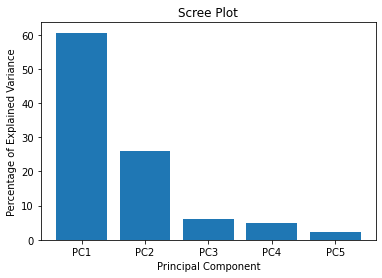

In [29]:
# Calculate the percentage of variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)

# create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Use matplotlib to create a bar plot
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Almost all the variation is along the first two components, so a 2D graph should do a good job representing the original data. We'll do this by drawing a PCA plot.

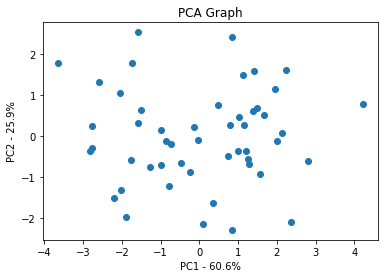

In [36]:
# Put new coordinates into a matrix 
pca_df = pd.DataFrame(pca_data, columns = labels)

# draw a scatterplot
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.show()

Not much correlation between the data.

#### Loading Scores for PC1
Used to determine which samples had the largest influence on separating clusters

In [38]:
loading_scores = pd.Series(pca.components_[0])

# Sort loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

# Getting the names of the top 5 indexes
top_ten = sorted_loading_scores[0:5].index.values

print(loading_scores[top_ten])

2   -0.532388
3    0.504477
1    0.478745
0   -0.457533
4   -0.153403
dtype: float64


These values are not very similar, so not very many pastries played a role in separating the samples. These were the main pastries.

### Problem 7
Performing PCA on the MNIST dataset. Display the first three principal components in a plot.

In [64]:
!pip install keras

     |████████████████████████████████| 1.4 MB 656 kB/s eta 0:00:01


In [66]:
!pip install tensorflow

     |████████████████████████████████| 217.5 MB 27 kB/s  eta 0:00:011   |█▎                              | 8.7 MB 11.4 MB/s eta 0:00:19     |████▋                           | 31.3 MB 13.1 MB/s eta 0:00:15     |█████▍                          | 36.7 MB 10.0 MB/s eta 0:00:18     |██████▏                         | 42.0 MB 10.0 MB/s eta 0:00:18     |████████                        | 54.2 MB 15.4 MB/s eta 0:00:11     |█████████                       | 61.0 MB 9.5 MB/s eta 0:00:17     |██████████▍                     | 70.6 MB 4.5 MB/s eta 0:00:33     |██████████▉                     | 73.3 MB 4.5 MB/s eta 0:00:33     |███████████▏                    | 75.6 MB 4.5 MB/s eta 0:00:32     |████████████                    | 81.1 MB 4.5 MB/s eta 0:00:31     |████████████▏                   | 82.6 MB 4.5 MB/s eta 0:00:31     |██████████████                  | 94.5 MB 7.6 MB/s eta 0:00:17     |███████████████████████████▌    | 186.9 MB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 1

In [67]:
from keras.datasets import mnist

In [68]:
# We will be using the training set for the most part here
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


### Problem 8: Conventional linear PCA as a special case of kernel PCA

**Kernel PCA**: A generalization of normal PCA which can account for nonlinearities. Kernel PCA uses a kernel function to project the data set into a higher dimensional feature space, where it is linearly separable. Similar to the idea of SVMs. 

The linear kernel function is a modification of the covariance matrix. In this case, modifying the kernel function would yield a different covariance matrix to optimize for linear PCA


### Problem 9: PCA with generated data

In [54]:
import random as rd  # for gaussian distributions

X = ['X' + str(i) for i in range(1,4)]  # feature names

generated_df = pd.DataFrame(columns = [*X])

# Generating the data for each feature
generated_df['X1'] = np.random.normal(size = 200)

generated_df['X2'] = generated_df['X1'] + 0.001 * np.random.normal(size = 200)

generated_df['X3'] = 10 * np.random.normal(size = 200)

generated_df.head()

,X1,X2,X3
0,0.943376,0.944033,-0.990291
1,0.285169,0.285216,17.197250
2,0.746044,0.746723,15.866295
3,0.516186,0.516772,-0.342510
4,-2.035714,-2.034883,-10.134063


#### Preprocessing

In [71]:
generated_scaled_data = preprocessing.scale(generated_df)

In [73]:
generated_pca = PCA()  # PCA object
generated_pca.fit(generated_scaled_data)  # fit method to do PCA math. Calculate loading scores.
generated_pca_data = generated_pca.transform(generated_scaled_data)  # generate coordinates for a PCA graph

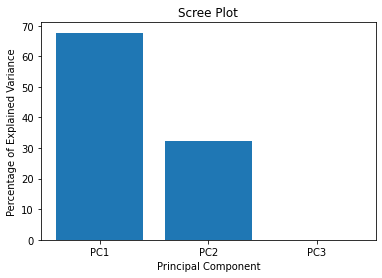

In [75]:
# Calculate the percentage of variation that each PC accounts for
generated_per_var = np.round(generated_pca.explained_variance_ratio_* 100, decimals = 1)

# create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(generated_per_var)+1)]

# Use matplotlib to create a bar plot
plt.bar(x = range(1, len(generated_per_var)+1), height = generated_per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()